<a href="https://colab.research.google.com/github/mehrnazeraeisi/Breast_Cancer/blob/main/Comparison_Chart_Breast_Cancer_KnnRegression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split


In [20]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [21]:
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

In [22]:
# مثال برای بارگذاری دیتاست Breast Cancer
data = load_breast_cancer()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names

In [23]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Cancer dataset):
                    Feature  R2_Score
22          worst perimeter  0.798515
23               worst area  0.795207
20             worst radius  0.781073
27     worst concave points  0.768442
7       mean concave points  0.767240
2            mean perimeter  0.726943
6            mean concavity  0.713410
0               mean radius  0.698975
3                 mean area  0.695367
13               area error  0.664993
26          worst concavity  0.634320
12          perimeter error  0.565454
10             radius error  0.534479
25        worst compactness  0.511624
5          mean compactness  0.492378
21            worst texture  0.377501
17     concave points error  0.374795
1              mean texture  0.363969
16          concavity error  0.362164
28           worst symmetry  0.342918
24         worst smoothness  0.334798
4           mean smoothness  0.323070
29  worst fractal dimension  0.314048
15        compactness error  0.301

In [24]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.7) & (data_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.6) & (data_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.5) & (data_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.4) & (data_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.3) & (data_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.2) & (data_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = data_scores[data_scores['R2_Score'] <= 0.2]['Feature'].tolist()


week_features=data_scores[(data_scores['R2_Score'] > 0.6) ]['Feature'].tolist()


In [25]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [26]:

# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features,week_features]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

In [27]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features','week_features'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and Accuracy):
               Feature_Group  R2_Score  Accuracy
0               All Features  0.847533  0.947276
1            Strong Features       NaN       NaN
2  Medium Features (0.7-0.8)  0.814153  0.929701
3  Medium Features (0.6-0.7)  0.710703  0.903339
4  Medium Features (0.5-0.6)  0.683939  0.882250
5  Medium Features (0.4-0.5)  0.492378  0.817223
6  Medium Features (0.3-0.4)  0.428624  0.787346
7  Medium Features (0.2-0.3)  0.420505  0.803163
8              Poor Features  0.199473  0.702988
9              week_features  0.843022  0.945518


In [28]:

def knn_evaluation(X_data, y_data, medium_features_1, week_features, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    r2_scores = {
        "all_features": [],
        "medium_features_1": [],

        "week_features": []
    }
    accuracy_scores = {
        "all_features": [],
        "medium_features_1": [],

        "week_features": []
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_1": medium_features_1,

        "week_features": week_features
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))

            # KNN Classifier
            knn_cls = KNeighborsClassifier(n_neighbors=5)
            knn_cls.fit(X_train[group_features], y_train)
            y_pred_cls = knn_cls.predict(X_test[group_features])
            accuracy_scores[group_name].append(accuracy_score(y_test, y_pred_cls))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # Accuracy plot
    plt.figure( figsize=(8, 4))
    for group_name, accuracy_list in accuracy_scores.items():
        plt.plot(x, accuracy_list, label=f"{group_name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Performance')
    plt.legend()
    plt.show()


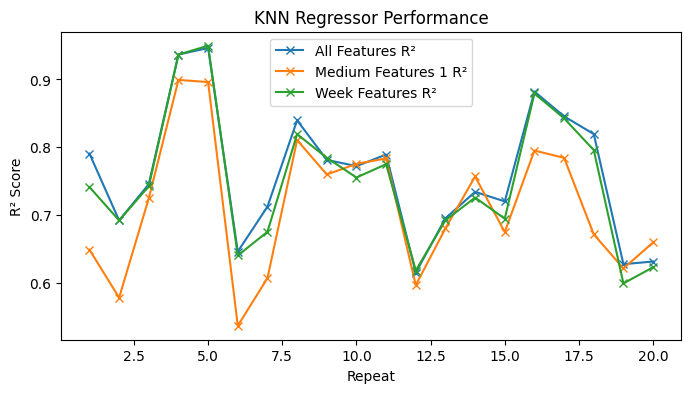

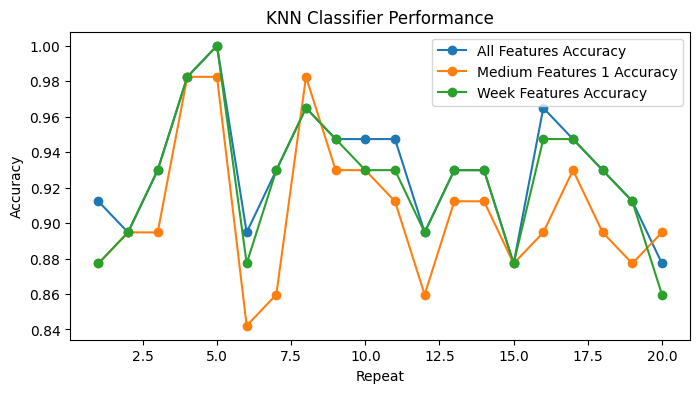

In [29]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_1, week_features, data_features, test_size=0.1, n_repeats=20)


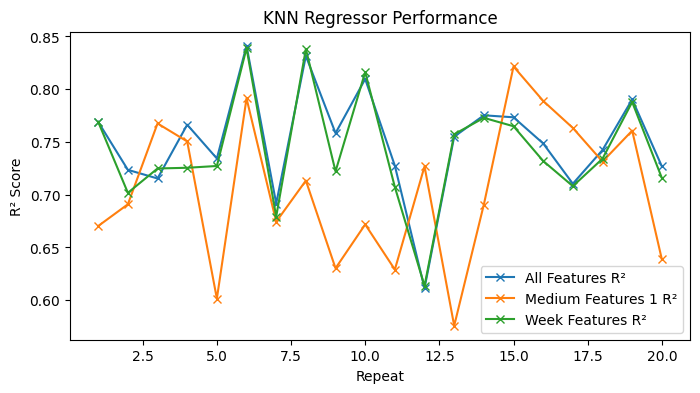

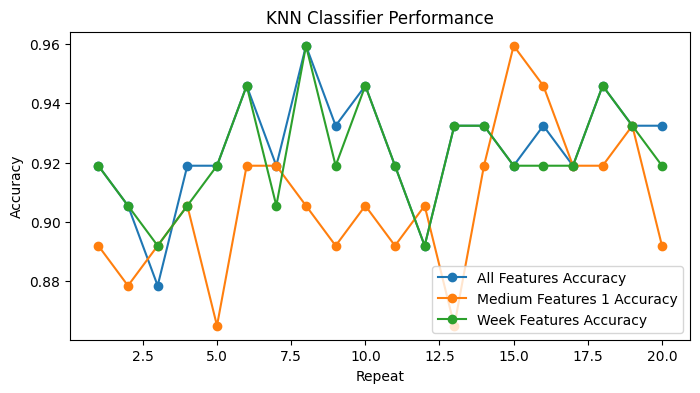

In [30]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_1,  week_features, data_features, test_size=0.13, n_repeats=20)


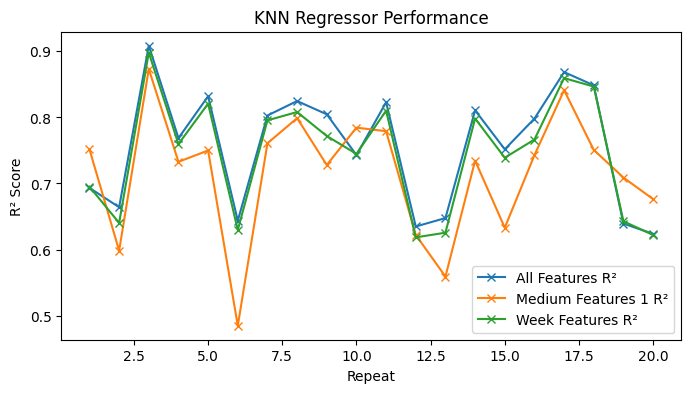

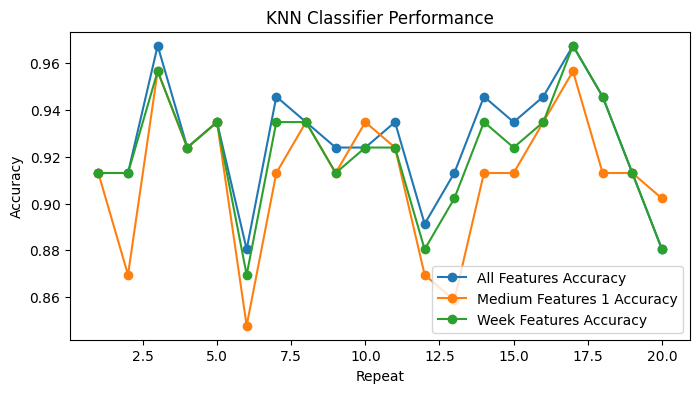

In [32]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_1,  week_features, data_features, test_size=0.16, n_repeats=20)


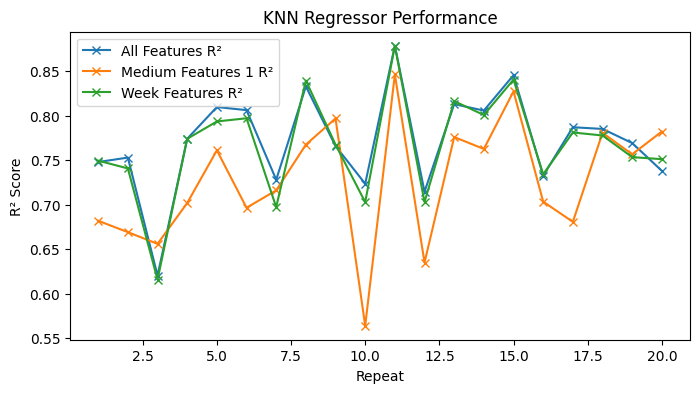

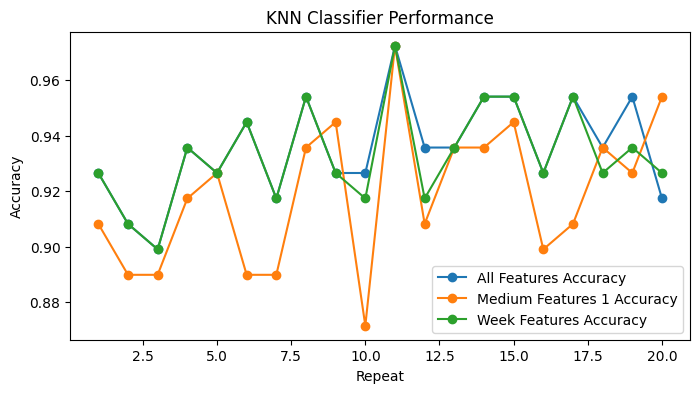

In [33]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_1,  week_features, data_features, test_size=0.19, n_repeats=20)


🔎 Feature Group Performance Summary (Cancer dataset):
                         Feature  R2_Score
6                     flavanoids  0.825057
11  od280/od315_of_diluted_wines  0.733635
10                           hue  0.638075
5                  total_phenols  0.634689
12                       proline  0.613620
8                proanthocyanins  0.529346
1                     malic_acid  0.509783
9                color_intensity  0.397292
3              alcalinity_of_ash  0.392402
0                        alcohol  0.314524
7           nonflavanoid_phenols  0.253576
2                            ash  0.182846
4                      magnesium  0.163282

📊 Grouped Feature Performance Summary (R² and Accuracy):
               Feature_Group  R2_Score  Accuracy
0               All Features  0.674568  0.786517
1            Strong Features  0.825057  0.842697
2  Medium Features (0.7-0.8)  0.733635  0.769663
3  Medium Features (0.6-0.7)  0.664786  0.792135
4  Medium Features (0.5-0.6)  0.607224  0

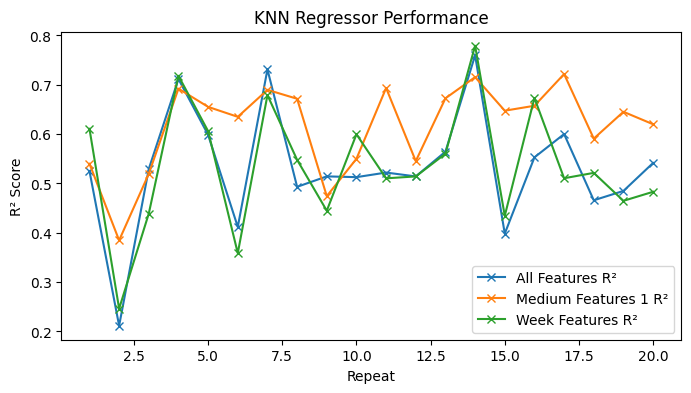

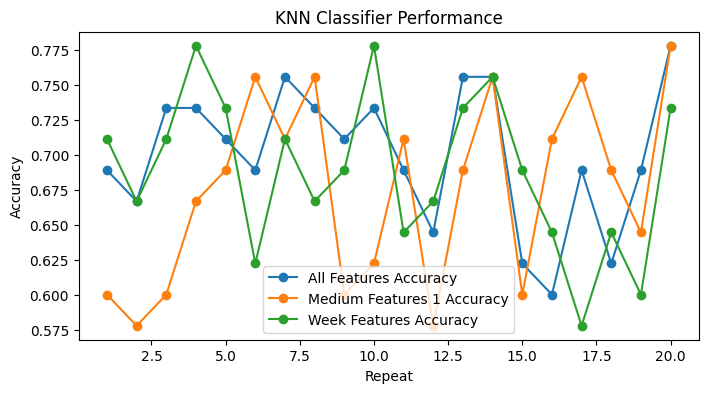

In [34]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split



#[2]
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores



#[3]
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)



#[4]
# مثال برای بارگذاری دیتاست wine
data = load_wine()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names


#[5]
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score


#[6]
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.7) & (data_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.6) & (data_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.5) & (data_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.4) & (data_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.3) & (data_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.2) & (data_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = data_scores[data_scores['R2_Score'] <= 0.2]['Feature'].tolist()

week_features=data_scores[(data_scores['R2_Score'] > 0.6) ]['Feature'].tolist()

#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)






#[8]
# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features , week_features]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]


[9]
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features' , 'week features'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)





def knn_evaluation(X_data, y_data, medium_features_1, week_features, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    r2_scores = {
        "all_features": [],
        "medium_features_1": [],

        "week_features": []
    }
    accuracy_scores = {
        "all_features": [],
        "medium_features_1": [],

        "week_features": []
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_1": medium_features_1,

        "week_features": week_features
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))

            # KNN Classifier
            knn_cls = KNeighborsClassifier(n_neighbors=5)
            knn_cls.fit(X_train[group_features], y_train)
            y_pred_cls = knn_cls.predict(X_test[group_features])
            accuracy_scores[group_name].append(accuracy_score(y_test, y_pred_cls))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # Accuracy plot
    plt.figure( figsize=(8, 4))
    for group_name, accuracy_list in accuracy_scores.items():
        plt.plot(x, accuracy_list, label=f"{group_name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Performance')
    plt.legend()
    plt.show()

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_1,  week_features, data_features, test_size=0.25, n_repeats=20)
